In [0]:
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
drive

In [0]:
from fastai.vision import *

In [0]:
from fastai import *

In [0]:
folder = 'black'
file = 'black.txt'

In [0]:
folder = 'teddys'
file = 'teddy.txt'

In [0]:
folder = 'grizzly'
file = 'grizzly.txt'

In [0]:
path = Path('drive/My Drive/data')
dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)

In [10]:

print(path.ls())
print(path)
print(dest)

[PosixPath('drive/My Drive/data/black'), PosixPath('drive/My Drive/data/teddys'), PosixPath('drive/My Drive/data/grizzly'), PosixPath('drive/My Drive/data/models'), PosixPath('drive/My Drive/data/cleaned.csv')]
drive/My Drive/data
drive/My Drive/data/teddys


In [71]:
dest = path/folder
print(dest)
print(file)

drive/My Drive/data/teddys
teddy.txt


In [0]:
download_images(dest/file, dest, max_pics=200)

In [0]:
classes = ['teddys','grizzly','black']

In [0]:
!pip install -U -q PyDrive

In [0]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_workers=8)

In [0]:
import numpy as np
np.random.seed(42)

In [0]:
data = ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [16]:
data.classes

['black', 'grizzly', 'teddys']

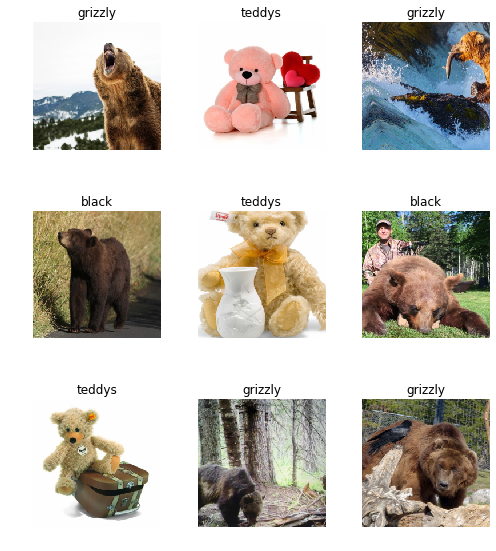

In [17]:
data.show_batch(rows=3, figsize=(7,8))

In [18]:
data.classes, data.c,len(data.train_ds),len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 441, 110)

In [19]:
learn = create_cnn(data, models.resnet34,metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [100]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.870048,0.468521,0.209091,00:25
1,0.502459,0.308280,0.054545,00:24
2,0.376319,0.291634,0.054545,00:24
3,0.299214,0.277826,0.045455,00:24


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [105]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


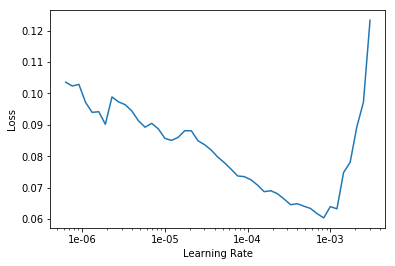

In [106]:
learn.recorder.plot()

In [107]:
learn.fit_one_cycle(2,max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.142077,0.285592,0.054545,00:24
1,0.107600,0.299110,0.072727,00:25


In [0]:
learn.save('stage-2')

In [20]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (441 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: drive/My Drive/data;

Valid: LabelList (110 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,black,black,black,teddys
Path: drive/My Drive/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tr

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

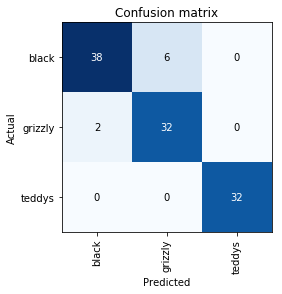

In [22]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
#losses,idxs=interp.top_losses()
#top_loss_path=data.valid_ds.x[idxs]

In [0]:
#fd = FileDeleter(file_paths=top_loss_path)

In [0]:

db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:

ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
#ImageCleaner(ds, idxs, path)

drive/My Drive/data


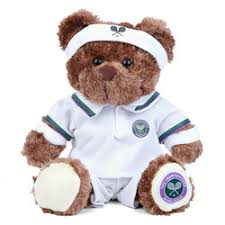

In [28]:
print(path)
img = open_image(path/'teddy.jpg')
img

In [29]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category teddys